## Earth System Modeling Final Project: Topographically Induced Gravity Waves in the Atmosphere
### Daniel Lamprea and Maxwell Jiang

### Introduction

Within the atmosphere, small disturbances can cause waves called gravity waves to propagate. These waves undergo oscillations due to the buoyancy force, which will eventually help restore them to an equilibrium state. These waves can propagate in any direction due to the lack of an upper bound in the atmosphere. This model will represent gravity waves caused by a topographic feature. A series of rolling hills are assumed to be in the shape of a sinusoidal wave, and a wind with a constant horizontal velocity is moved over these hills. The resulting vertical velocity is then observed, and the wave flow of the atmosphere is modeled. This model provides a simple way to observe how topography can impact atmospheric flow and induce vertical motion, which can then lead to other atmospheric events.
 


This model provides a relatively simple model for gravity wave propagation. Because the horizontal flow is assumed to be constant and the terrain does not change, the flow is not time-dependent and is only dependent on horizontal and vertical position. Other, more complex models, include a time and spatial dependency. Also, they have different forcing methods and model gravity waves in the open atmosphere. This model is based on a simple Laplacian equation; while others include far more complex terms. Overall, this model is one of the most simple ways to demonstrate how external disturbances impact atmospheric flow. 

In [8]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import spdiags

### Equations

The equation in this model solves for the vertical velocity of wind when it moves with a constant horizontal velocity over some topographic feature. w' represents the vertical velocity while u represents the horizontal velocity. As the air flows over the feature of interest, the air at the ground will gain some vertical velocity based on the shape of the ground. For this model, the ground is assumed to be a series of rolling hills modeled by a sinusoidal wave. 

The equation that is being solved is:

$$\left ( \frac{\partial^2 w'}{\partial x^2} +\frac{\partial^2w'}{\partial z^2}\right ) + \frac{N^2}{\bar{u}^2}w'=0$$

w' is the perturbation in vertical velocity and is the variable that is being solved for. In order to simplify the equations governing atmospheric waves, many dynamics equations split the waves into background flow (variable such as $\bar{u}$) and perturbation (variable with '). However, because the background vertical velocity in the atmosphere on a large scale is generally assumed to be 0, the perturbation in vertical velocity can be assumed to be the vertical velocity. $N^2$ is the square of the buoyancy frequency and describes how waves propagate in the atmosphere. $\bar{u}$ is the background horizontal flow in the atmosphere. $N^2$ and $\bar{u}$ are assumed to be constants for this problem. This equation is a simplified version of a much more complex, time-dependent gravity wave equation. However, because horizontal velocity and the ground share are both constant, there is no time dependency in the equation. Rather, the flow only depends on position in the horizontal and vertical directions.

Discretizing this equation gives the following:

$$\frac{w_{i-1}^j-2w_i^j+w_{i+1}^j}{\Delta x^2}+\frac{N^2}{\bar{u}^2}w^j_i = -\frac{w_{i}^{j-1}-2w_i^j+w_{i}^{j+1}}{\Delta z^2}$$
$$\rightarrow w_i^{j+1} = \left ( 2 + \frac{2\Delta z^2}{\Delta x^2} - \frac{N^2}{\bar{u}^2}\Delta z^2 \right ) w_{i}^j - \frac{\Delta z^2}{\Delta x^2} w^j_{i-1} - \frac{\Delta z^2}{\Delta x^2} w^j_{i+1} - w^{j-1}_i$$

j is the z index in the equation and i is the x index. 

#### Parameters

The required parameters are the background horizontal wind speed, the grid steps in both the horizontal and vertical directions, the dimensions of the domain that the model will cover, and the ground and its slope. 

In [20]:
u = 10 # Background horizontal velocity (m/s)
dx = 8 # horizontal gridstep (m)
dz = 0.1 #vertical gridstep (m)
N2 = 10     #constant. N^2 = g * d ln(θ)/dz, where θ is the potential temperature. Relates change in temperature with change in height. Does technically vary with
            #height but is assumed to be constant. Square of the buoancy frequency.
xlen = 1000 #meters, length of x domain
zlen = 250 # meters, height of z domain

#Setting up the ground
def ground(x):
    ans = 10 * np.sin((np.pi * x) / 250) + 10
    return ans
# Setting up the slope of the ground
def slope(y):
    der =  np.pi  * np.cos((np.pi * y) / 250) / 25
    return der
nx = int(xlen / dx) + 1 # number of x gridsteps
nz = int(zlen / dz) # number of z gridsteps

xpos = np.arange(0, xlen + 1, dx) # vector of x gridstep locations
zpos = np.arange(0, zlen + dz, dz) # vector of z gridstep locations

#### Setting up Solution Vectors and Initial Conditions

The initial conditions for this model are based on the slope of the ground. Because the slope of the ground would equal $\frac{dz}{dx}$, we can assume that the slope would also be equal to $\frac{w}{u}$ (vertical velocity over horizontal velocity). Thus, the initial condition at the ground was chosen to be $u\frac{dz}{dx}$. Because this problem also requires an initial condition at the second point, an arbitrarily lower value, assumed to be .95 times the initial velocity, was introduced as a damping of the velocity. Both of these terms are assumptions made to simplify the model and to guess what the velocities at the ground could be, but they do not perfectly represent the physical processes occurring. This is mainly because a truly constant horizontal velocity field is impossible, and to conserve momentum it would decrease as vertical velocity increases. 

In [24]:
initial_w = u * slope(xpos) # inital upward velocity based on the slope of the ground
solution = np.zeros([nx, nz]) # setting up the matrix to store the solution
solution[:,0] = initial_w # ground initial condition
solution[:,1] = initial_w * .95 # second initial condition. Assumed to be damped slightly from the velocity at the ground level.
print(solution)
print(initial_w)

[[1.25663706 1.19380521 0.         ... 0.         0.         0.        ]
 [1.25029232 1.18777771 0.         ... 0.         0.         0.        ]
 [1.23132217 1.16975606 0.         ... 0.         0.         0.        ]
 ...
 [1.23132217 1.16975606 0.         ... 0.         0.         0.        ]
 [1.25029232 1.18777771 0.         ... 0.         0.         0.        ]
 [1.25663706 1.19380521 0.         ... 0.         0.         0.        ]]
[ 1.25663706  1.25029232  1.23132217  1.19991818  1.15639744  1.10119945
  1.03488158  0.95811352  0.87167045  0.77642529  0.67333981  0.56345497
  0.44788038  0.3277831   0.20437589  0.07890489 -0.04736288 -0.17315239
 -0.2971934  -0.41823337 -0.53505004 -0.64646378 -0.75134956 -0.84864824
 -0.93737729 -1.01664074 -1.08563818 -1.14367289 -1.19015883 -1.22462659
 -1.2467281  -1.2562402  -1.25306683 -1.23724003 -1.20891963 -1.16839159
 -1.11606518 -1.05246878 -0.97824458 -0.8941421  -0.80101061 -0.69979054
 -0.59150401 -0.47724449 -0.35816577 -0.23547

### Numerical Methods

The matrix form of the discretization above is the following:

$$\begin{bmatrix}\  \vdots \\ w^{j+1}_i \\ \vdots\end{bmatrix} = \begin{bmatrix} 2 + \frac{2\Delta z^2}{\Delta x^2} - \frac{N^2}{\bar{u}^2}\Delta z^2 & -\frac{\Delta z^2}{\Delta x^2} & \cdots & 0 \\ -\frac{\Delta z^2}{\Delta x^2}  & \ddots & \ddots & \vdots \\ \vdots & \ddots & \ddots & -\frac{\Delta z^2}{\Delta x^2}\\ 0 & \cdots & -\frac{\Delta z^2}{\Delta x^2} & 2 + \frac{2\Delta z^2}{\Delta x^2} - \frac{N^2}{\bar{u}^2}\Delta z^2\end{bmatrix}\begin{bmatrix}\  \vdots \\ w^{j}_i \\ \vdots\end{bmatrix} - \begin{bmatrix}\  \vdots \\ w^{j-1}_i \\ \vdots\end{bmatrix}$$ 

This matrix will be set up to solve the equation numerically. This is a forward Euler method using central finite differencing, meaning it takes initial conditions around the first points and integrates forward. For this problem, it specifically takes the conditions spatially adjacent to the prior timestep and the condition 2 time steps prior to determining the conditions at the next time step.  

#### Setting up the solving matrix

In [31]:
c1 = (-dz ** 2) / (dx ** 2)
c2 = 2 + 2 * ((dz ** 2) / (dx ** 2)) - (N2 / u**2) * dz ** 2
mat = np.array([c1 * np.ones(nx), c2 * np.ones(nx), c1 * np.ones(nx)])
diags = np.array([-1,0,1])
M = spdiags(mat, diags, nx, nx).toarray()

#### Boundary Conditions

This model uses Dirichlet boundary conditions because the velocity at the bottom of the system is a known value, based on the initial conditions explained above. 

In [35]:
# Dirichlet Boundary Conditions at Top and Bottom
M[0,0] = 1
M[0,1] = 0 
 
M[-1,-1] = 1 
M[-1,-2] = 0 

#### Looping and Solving

In [38]:
for k in np.arange(nz-2):
    solution[:,k+2] = np.matmul(M,solution[:,k+1]) - solution[:,k]

### Results and Figures

The model was run with the initial conditions and parameters described above. The outputs for the model are below.

The model was very sensitive to the grid spaces and became unstable very easily. The stability condition for this model is when $\frac{\Delta z}{\Delta x^2}$ is a small value. Because of this, the easiest way to make the solution stable is to make dx much larger than dz. If this is not fulfilled, the model will give out values many orders of magnitude greater than expected and is unstable. Therefore, a large horizontal step and a small vertical step gave the best results. Stability also depended on the $\frac{N^2}{u}$ term, and this works best when this value was around 0.1. If it got too large, the system would also become unstable.

#### Plotting Ground Relative Vertical Velocity

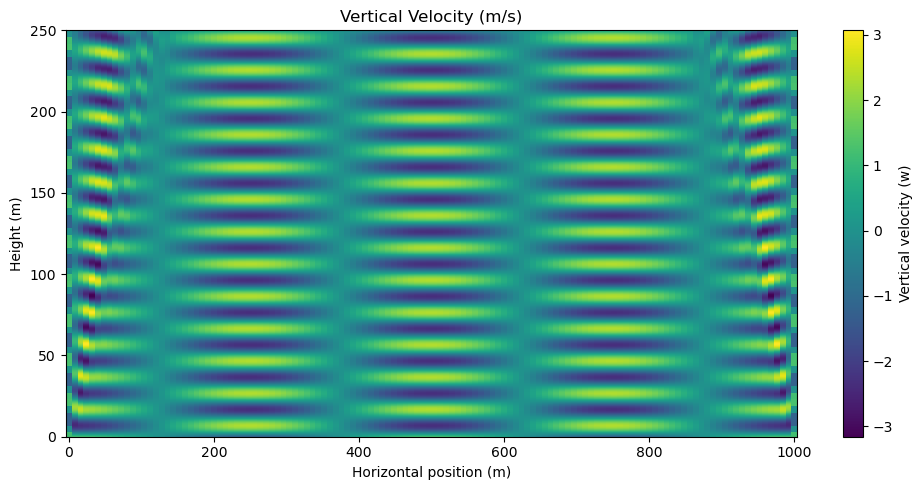

In [44]:
z_domain = np.linspace(0,zlen,nz)
x_domain = np.linspace(0,xlen,nx)
plt.figure(figsize=(10, 5))
plt.pcolormesh(x_domain, z_domain, solution.T, cmap='viridis')
plt.colorbar(label="Vertical velocity (w)")
plt.xlabel("Horizontal position (m)")
plt.ylabel("Height (m)")
plt.title("Vertical Velocity (m/s)")
plt.tight_layout()
plt.show()

This plot shows the vertical velocity relative to the ground. While the ground is a wave pattern, this plot represents it as a flat line. The wave behavior of the vertical velocity can be seen as it alternates between positive and negative values. The vertical motion induced by the ground is visible in a shallow layer right at the bottom of the plot. While this plot helps show the oscillations in the vertical velocity, it does not show how the flow changes with altitude, only relative to the ground. 

#### Plotting Altitude Relative Vertical Velocity

In [48]:
ground_pos = ground(xpos) # Getting the position of the ground
tsol = solution.transpose() #making the matrix the right orientation
l,w = np.shape(tsol) #getting the shape of the solution
newl = l + 1000 #making a matrix of new height, arbitrary more rows that the original
altarr = np.full((newl, w),np.nan) #making a nan array
print(np.shape(altarr))
#shifting the data according to the ground altitude at the position
for i in np.arange(0,len(ground_pos) - 1):
    shift = np.round(ground_pos[i] / dz).astype(int)
    altarr[shift:shift + l,i] = tsol[:,i]
    

altitudearr= altarr[~np.isnan(altarr).all(axis=1)] # removing excess rows
newsize, var1 = np.shape(altitudearr) # getting the size of the new array
print(newsize)
# creating parameters for the new plots
newlenz = newsize * dz
print(newlenz)
nz1 = int(newlenz / dz) 
newz = np.linspace(0,newlenz,nz1)

(3500, 126)
2700
270.0


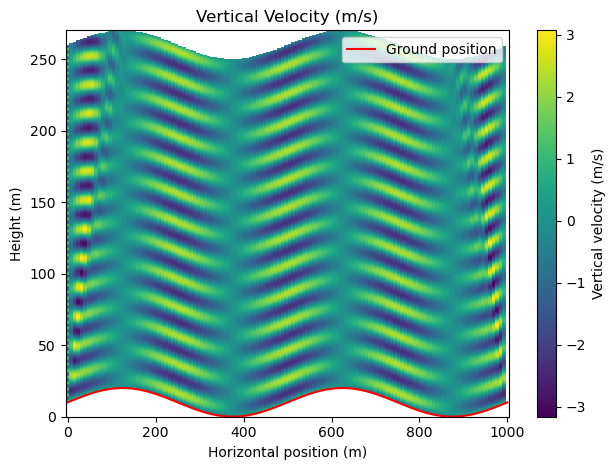

In [50]:
fig, ax = plt.subplots()

vertical_vel = ax.pcolormesh(x_domain, newz, altitudearr, cmap='viridis', shading='auto')
cbar = fig.colorbar(vertical_vel, ax=ax)
cbar.set_label("Vertical velocity (m/s)")
ax.plot(x_domain, ground_pos, color='red', label='Ground position')
ax.set_xlabel("Horizontal position (m)")
ax.set_ylabel("Height (m)")
ax.set_title("Vertical Velocity (m/s)")
ax.legend()

plt.tight_layout()
plt.show()

This plot shows the same data as the plot above; however, it has been adjusted for the change in altitude of the ground itself. The altitude of the ground is plotted with a red line. This plot shows much more clearly how the terrain impacts the upward vertical motion. Over the slopes of the terrain, there are alternate regions of upward and downward motion induced by the motion and its translation from the surface. 

#### Plotting a Vector Field of the Solution

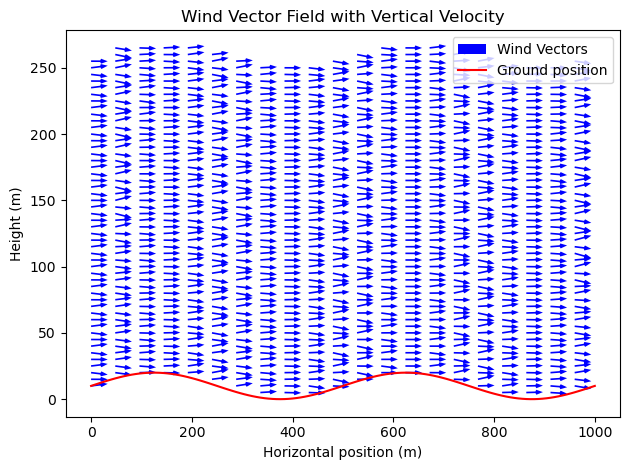

In [53]:

fig, ax = plt.subplots()

# Creating Wind Vectors
u = 10 * np.ones_like(altitudearr)  # Horizontal velocity component (constant u)
v = altitudearr  # Vertical velocity component (from altitudearr)

#Skipping some vectors for x and z so the plot is not a mess
skip_x = 6  
skip_z = 50  

x_skip = x_domain[::skip_x]
z_skip = newz[::skip_z]

# Use np.meshgrid to create a grid of coordinates
X, Z = np.meshgrid(x_skip, z_skip)

# Skipping some coordinates
U = u[::skip_z, ::skip_x]  
V = v[::skip_z, ::skip_x]

#Plot
scaling_factor = 0.003  # Making the vectors smaller
U = U * scaling_factor
V = V * scaling_factor
ax.quiver(X, Z, U, V, scale=1, color='blue', headlength=4, width=0.003, label = 'Wind Vectors')

ax.set_xlabel("Horizontal position (m)")
ax.set_ylabel("Height (m)")
ax.set_title("Wind Vector Field with Vertical Velocity")
ax.plot(x_domain, ground_pos, color='red', label='Ground position')
plt.legend()

plt.tight_layout()
plt.show()

# ChatGPT was used in order to help with the vector field plotting function and making the plot look decent 

Because this model represents a flow field, a vector field best represents the output from the model. Each of the vectors has a constant horizontal component defined by u. Within this field, several regions of recurring convergent and divergent flow can be observed. Also, while it appears the surface vectors are moving opposite to the slope of the ground, this is because some of the vectors at the lowest levels were cut to make the plot look more presentable. 

#### Analytical Solution from Textbook
Analytically, this problem is solved by the following equation
$$w(x, z) = \begin{Bmatrix} -\bar{u}h_Mke^{-\mu z}\text{sin}kx, & \bar{u}k > N \\ -\bar{u}h_Mk\text{sin}(kx+mz), & \bar{u}k < N\end{Bmatrix}$$
where $h_m$ is the amplitude of the surface &, $k$ is the zonal wave number, which we do not know how to choose for our sandbox case. Therefore, the following is an approximation of our conditions.e

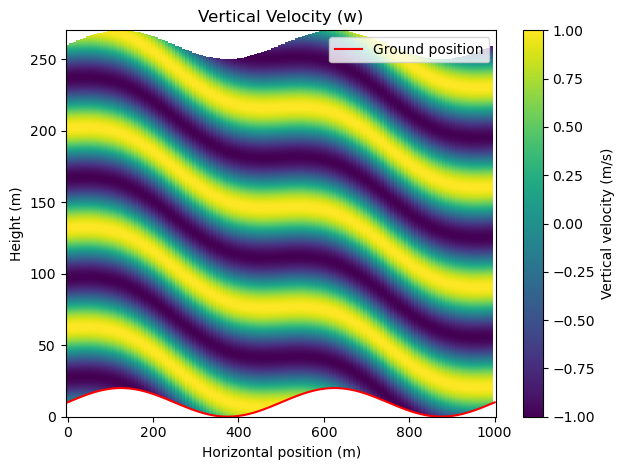

In [57]:
N21 = 10
k_const = 0.010 # Approximate guess of k that makes a graph look good - an approximation, represents much of the difference between numerical
                 # and analytical solution
m = N21 / 10**2 - k_const # magnitude of m (property of system)
def wExpect(x, z, m, k_const): # Implementation fo analytical solution
    output = -10 * 10*k_const*np.exp(-(abs(m))**0.5*z)*np.sin(k_const*x)
    return output
def wExpect2(x, z, m, k_const):
    output = -10 * 10 * k_const * np.sin(k_const * x + m*z)
    return output
# Plotting and adjusting to be ground relative

z_domain = np.linspace(0,zlen,nz)
x_domain = np.linspace(0,xlen,nx)
xx, zz = np.meshgrid(x_domain, z_domain)
if (10*k_const > N21**0.5):
    toPlotExpect = wExpect(xx, zz, m, k_const)
else:
    toPlotExpect = wExpect2(xx, zz, m, k_const)

tsol = toPlotExpect
l,w = np.shape(tsol)

newl = l + 1000
altarr = np.full((newl, w),np.nan)

for i in np.arange(0,len(ground_pos) - 1):
    shift = np.round(ground_pos[i] / dz).astype(int)
    altarr[shift:shift + l,i] = tsol[:,i]
altitudearr= altarr[~np.isnan(altarr).all(axis=1)]
newsize, var1 = np.shape(altitudearr)
newlenz = newsize * dz
nz1 = int(newlenz / dz) 
newz = np.linspace(0,newlenz,nz1)

fig, ax = plt.subplots()

vertical_vel = ax.pcolormesh(x_domain, newz, altitudearr, cmap='viridis', shading='auto')
cbar = fig.colorbar(vertical_vel, ax=ax)
cbar.set_label("Vertical velocity (m/s)")
ax.plot(x_domain, ground_pos, color='red', label='Ground position')
ax.set_xlabel("Horizontal position (m)")
ax.set_ylabel("Height (m)")
ax.set_title("Vertical Velocity (w)")
ax.legend()

plt.tight_layout()
plt.show()


Many of the differences between this analytical solution and the numerical solution can be attributed to the value of the zonal wavenumber k. This analytical solution does not technically solve the same problem as the numerical solution above. However, the pattern of alternating zonal regions of upward and downward vertical velocity is similar to those displayed in the numerical solution. One note about this is it lacks the line of zero vertical velocity on the peaks and valleys of the ground. If the initial conditions were ideally set, this could resemble better the numerical solution.

Overall, the model showed how topography can impact the flow of wind, specifically the vertical velocity of wind. Assuming the topography is a sinusoidal wave pattern, the resulting pattern of upward motion takes the pattern of a repeating wave as well. These results did generally match with other data and diagrams, although due to not knowing the exact boundary and initial conditions, recreating the exact solutions was difficult, as seen with the analytical solution. In general; however, the pattern in the numerical and analytical solutions were similar. This model was solving a Laplacian equation, which could actually be solved numerically purely as an inversion problem without any iteration. Solving it in this fashion would likely increase its accuracy and make the stability constraints less strict. Finally, this model represented a very simple gravity wave in the atmosphere, although the equations governing these waves are far more complex. In order to truly model these phenomena, a time-dependent term would likely be the first step to make a more accurate model. 

#### References
Holton, J. R. (2004). Atmospheric oscillations: Linear perturbation theory, $\textit{An Introduction to Dynamic Meteorology}$. https://doi.org/10.1016/S0074-6142(04)80041-X